In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("googleplaystore.csv")

# Check if the dataset is loaded correctly
print(df.head())  # Display the first 5 rows


                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [2]:
# Filter categories with more than 50 apps
category_counts = df['Category'].value_counts()
valid_categories = category_counts[category_counts > 50].index

# Apply filters
df_filtered = df[df['Category'].isin(valid_categories)]
print(df_filtered.head())  # Check the filtered data


                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

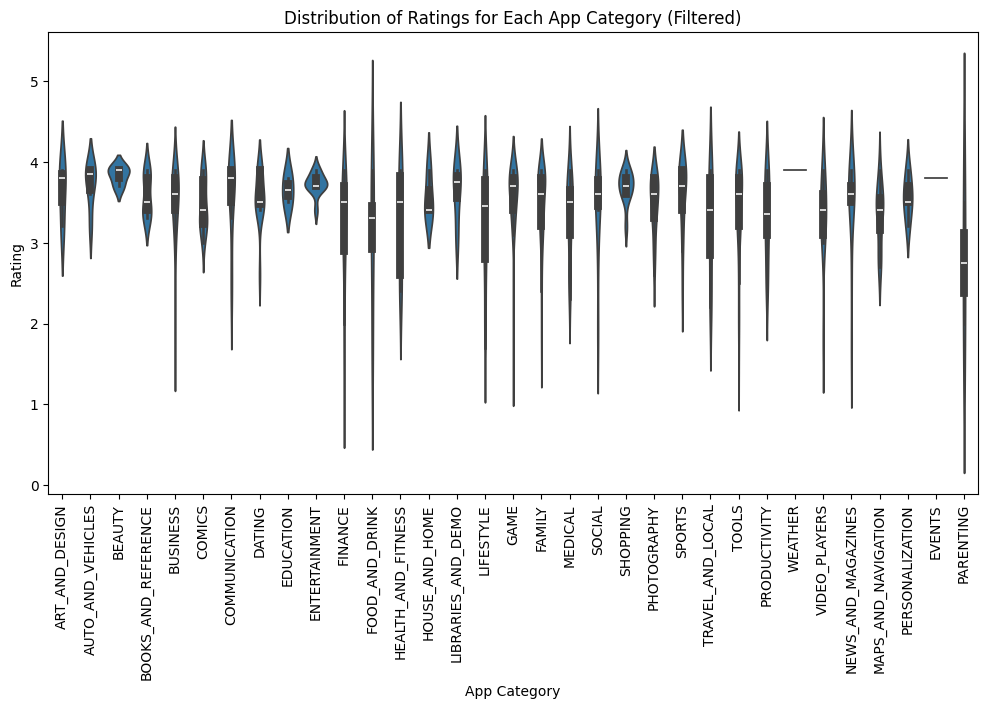

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("googleplaystore.csv")

# Convert 'Reviews' to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Convert 'Rating' to numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Filter categories with more than 50 apps
category_counts = df['Category'].value_counts()
valid_categories = category_counts[category_counts > 50].index

# Apply multiple filters:
df_filtered = df[
    (df['Category'].isin(valid_categories)) &  # Categories with more than 50 apps
    (df['App'].str.contains('C', na=False)) &  # App names containing letter "C"
    (df['Reviews'] >= 10) &  # Exclude apps with fewer than 10 reviews
    (df['Rating'] < 4.0)  # Include only apps with ratings < 4.0
]

# Plot the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x="Category", y="Rating", data=df_filtered)
plt.xticks(rotation=90)
plt.title("Distribution of Ratings for Each App Category (Filtered)")
plt.xlabel("App Category")
plt.ylabel("Rating")
plt.show()
